## Bank Customer Churn Modelling

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

### Data loading

In [16]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


### Data exploration

In [17]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [19]:
NUM_VARS = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
            'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

CAT_VARS = ['Geography', 'Gender']

### Numerical data analysis

Features distribution : 


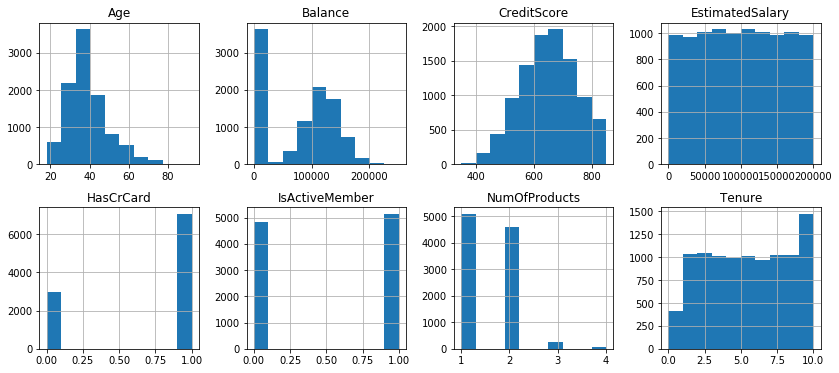

In [245]:
print("Features distribution : ")

fig, ax = plt.subplots(2, 4, figsize=(14, 6))
df[NUM_VARS].hist(ax=ax);

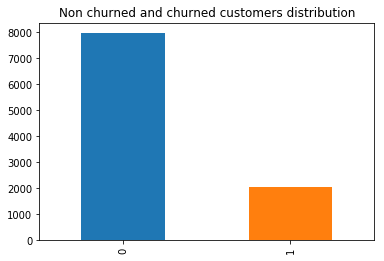

In [250]:
df.Exited.value_counts().plot.bar().set_title('Non churned and churned customers distribution');

<b> The dataset is unbalanced : there are way more non churned customers than churned ones. </b>
<p>

Non churned (green) and churned customers features distribution: 


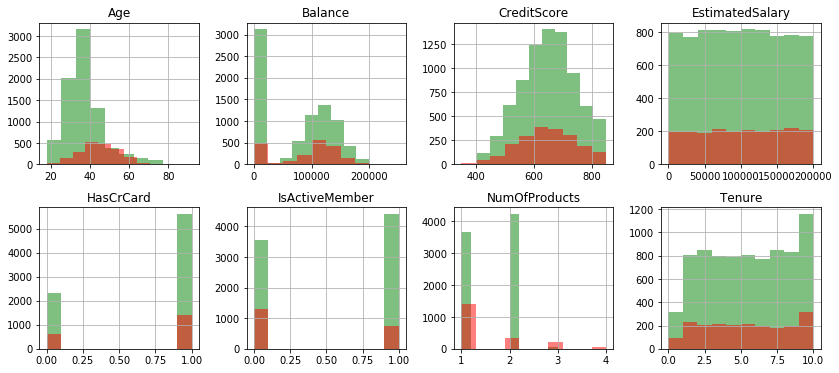

In [252]:
print("Non churned (green) and churned customers features distribution: ")

fig, ax = plt.subplots(2, 4, figsize=(14, 6))
df[df.Exited == 0][NUM_VARS].hist(ax=ax, color='green', alpha=0.5);
df[df.Exited == 1][NUM_VARS].hist(ax=ax, color='red', alpha=0.5);

Even though there are more non churned than churned bank customers in the dataset, we can still see relations between some features and the 'exited' feature : 
- Customers with <b> credit cards </b> and <b>active members</b> are less likely to churn
- <b>Younger</b> customers tend to stay
- The less one suscribes to a <b>product</b>, the more he will be likely to leave.

### Categorical data analysis

#### Geography

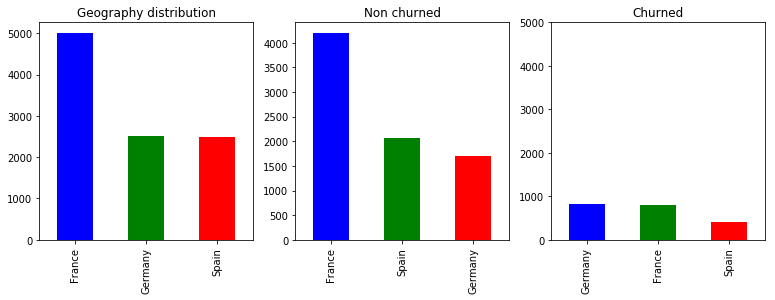

In [244]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4))
plt.ylim([0, 5000])

df['Geography'].value_counts().plot('bar', ax=ax[0]).set_title("Geography distribution")
df[df.Exited == 0]['Geography'].value_counts().plot('bar', ax=ax[1]).set_title('Non churned')
df[df.Exited == 1]['Geography'].value_counts().plot('bar', ax=ax[2]).set_title('Churned');

In [234]:
countries_churn = []

for country in ['France', 'Germany', 'Spain']:
    # For each country : 100 * number of churned customers / number of customers
    countries_churn.append( 100 * df[df.Exited == 1]['Geography'].value_counts()[country] / 
        df['Geography'].value_counts()[country])
    
print("Bank customer churn percentage by country:\n\n\
France : {} \n\
Germany : {} \n\
Spain : {}".format(round(countries_churn[0], 2), round(countries_churn[1], 2), round(countries_churn[2], 2)))

Bank customer churn percentage by country:

France : 16.15 
Germany : 32.44 
Spain : 16.67


#### Gender

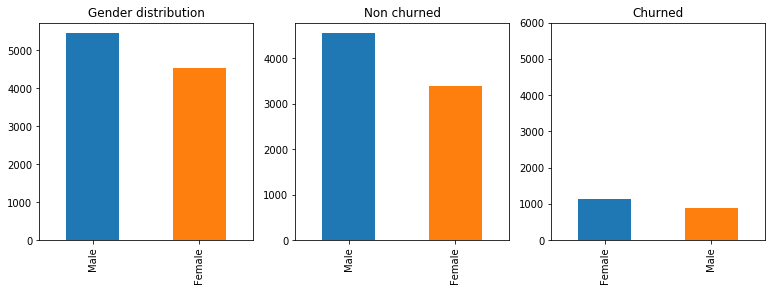

In [145]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4))
plt.ylim([0, 6000])
df['Gender'].value_counts().plot('bar', ax=ax[0]).set_title("Gender distribution")
df[df.Exited == 0]['Gender'].value_counts().plot('bar', ax=ax[1]).set_title('Non churned')
df[df.Exited == 1]['Gender'].value_counts().plot('bar', ax=ax[2]).set_title('Churned');

In [235]:
gender_churn = []
for gender in ['Male', 'Female']:
    # For both genders : 100 * number of churned customers / number of customers
    gender_churn.append( 100 * df[df.Exited == 1]['Gender'].value_counts()[gender] / 
        df['Gender'].value_counts()[gender])
    
print("Customer churn percentage by gender:\n\n\
Male : {} \n\
Female : {}".format(round(gender_churn[0], 2), round(gender_churn[1], 2)))

Customer churn percentage by gender:

Male : 16.46 
Female : 25.07


- <b>Customers from Germany are more keen to churn than those from France or Spain</b>
- <b>Male customers are less likely to leave</b>

### Data preparation

We will only use the features who seem important :

In [222]:
model_df = df.copy()
model_df.drop(['RowNumber', 'CustomerId', 'Surname', 
               'Exited','CreditScore','Tenure', 'Balance', 'EstimatedSalary'], axis = 1, inplace = True)
model_df.head(3)

,Geography,Gender,Age,NumOfProducts,HasCrCard,IsActiveMember
0,France,Female,42,1,1,1
1,Spain,Female,41,1,0,1
2,France,Female,42,3,1,0


<b>Categorical features encoding : </b>

In [223]:
for column in CAT_VARS:
    model_df[column] = df[column].astype('category').cat.codes
model_df.head(3)

,Geography,Gender,Age,NumOfProducts,HasCrCard,IsActiveMember
0,0,0,42,1,1,1
1,2,0,41,1,0,1
2,0,0,42,3,1,0


In [224]:
# Features in an X variable, target in a y variable.
X = model_df
y = df.Exited

### Classifier

In [183]:
import numpy as np
from sklearn.metrics import mean_squared_log_error as MSLE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

The dataset has to be split into a training sample and a test sample. 

In [225]:
# X_train and y_train: Training features and target, size 75% of the dataset

# X_test and y_test : Test features and target, size 25% of the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

We then split again our training set in order to validate our model.

In [226]:
# t_X and t_y: Training features and target, size 80% of the training dataset

# val_X and val_y : Validation features and target, size 20% of the trainning dataset

t_X, val_X, t_y, val_y = train_test_split(X_train, y_train, test_size=0.2, random_state = 0)

Training and predictions :

In [232]:
rf = RandomForestClassifier(n_estimators=30, max_depth=2, random_state=0, n_jobs=-1)
rf.fit(t_X, t_y)  
predictions = rf.predict(val_X)

In [255]:
# The classifier predictions 
# 0 : not likely to churn customer
# 1 : customer may churn

predictions[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

Evaluation with the root mean squared log error measure :

In [233]:
print(np.sqrt(MSLE((val_y),(predictions))))

0.2946215275816671


### Analysis

- The random forest algorithm is one of the most simple machine learning model that almost always gets good scores. 
- Only the features which seemed important after a short exploratory analysis were used.

To make the whole solution a better one :
- A deeper feature analysis (outliers, duplicates, unbalanced sample)
- Different classifiers comparison, with different parameters to find the most optimized ones.
- Different scoring and evaluation methods to validate the classifier.